In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
import pandas as pd
from regularization import *
from itertools import combinations_with_replacement
from sklearn.preprocessing import Normalizer
sns.set()
df = pd.read_csv('TempLinkoping2016.csv')
df.head()

,time,temp
0,0.002732,0.1
1,0.005464,-4.5
2,0.008197,-6.3
3,0.010929,-9.6
4,0.013661,-9.9


In [2]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:, 1].values

In [3]:
def train_gradient_mean_square(epoch, X, Y, learning_rate, degree, alpha = 0.0005, b = 0):
    n_features = X.shape[1]
    combs = [combinations_with_replacement(range(n_features), i) for i in range(0, degree + 1)]
    flat_combs = [item for sublist in combs for item in sublist]
    X_new = np.empty((X.shape[0], len(flat_combs)))
    for i, index_combs in enumerate(flat_combs):
        X_new[:, i] = np.prod(X[:, index_combs], axis=1)
    n_output_features = len(flat_combs)
    X = Normalizer().fit_transform(X_new)
    m = np.zeros(X.shape[1])
    for i in range(epoch):
        y_hat = X.dot(m) + b
        m_gradient = -(Y - y_hat).dot(X) + l2(alpha, m,grad=True)
        b_gradient = np.sum(-(Y - y_hat)) + l2(alpha, b,grad=True)
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
    return X, m, b

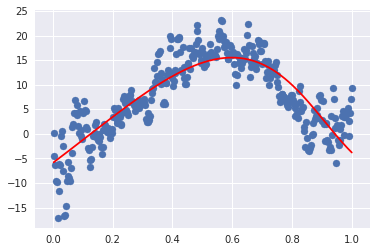

In [4]:
X_new, m, b= train_gradient_mean_square(1000, X, Y, 0.001, 10)
plt.scatter(X[:,0],Y)
plt.plot(X,X_new.dot(m) + b, c='red')
plt.show()

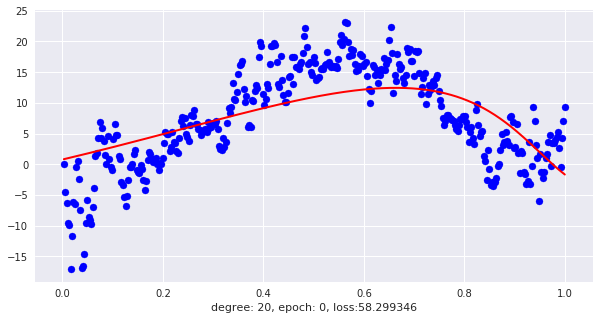

In [5]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:, 1].values
n_features = X.shape[1]
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.scatter(X[:,0],Y, c='b')
line, = ax.plot([],[], lw=2, c='r')
degree = 20
alpha = 0.0005
learning_rate = 0.001
combs = [combinations_with_replacement(range(n_features), i) for i in range(0, degree + 1)]
flat_combs = [item for sublist in combs for item in sublist]
X_new = np.empty((X.shape[0], len(flat_combs)))
for i, index_combs in enumerate(flat_combs):
    X_new[:, i] = np.prod(X[:, index_combs], axis=1)
n_output_features = len(flat_combs)
X_new = Normalizer().fit_transform(X_new)
m = np.zeros(X_new.shape[1])
b = 0
y_hat = X_new.dot(m) + b
cost = (2/X_new.shape[0]) * np.sum(np.square(Y-y_hat)) + l2(alpha, m)
ax.set_xlabel('degree: %d, epoch: %d, loss:%f'%(degree, 0, cost))

def train(epoch):
    global m, b
    y_hat = X_new.dot(m) + b
    cost = (2/X_new.shape[0]) * np.sum(np.square(Y-y_hat)) + l2(alpha, m)
    m_gradient = -(Y - y_hat).dot(X_new) + l2(alpha, m,grad=True)
    b_gradient = np.sum(-(Y - y_hat)) + l2(alpha, b,grad=True)
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient
    line.set_data(X,X_new.dot(m) + b)
    ax.set_xlabel('degree: %d, epoch: %d, loss:%f'%(degree, epoch, cost))
    return line, ax

anim = animation.FuncAnimation(fig, train, frames=100, interval=200)
anim.save('animation-ridge-regression.gif', writer='imagemagick', fps=10)